# Week 4 - Make Data Model Ready

In [1]:
import pandas as pd
import numpy as np
# import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)

train = pd.read_csv('train_set.csv')

C:\Users\MARIA\AppData\Local\Temp\ipykernel_1220\2926943440.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train_set.csv')


In [3]:
#Setting a variable for all products the bank offers
products = ['savings_acct', 'guarantees', 'current_acct', 'derivada_acct', 'payroll_acct', 
            'junior_acct', 'mas_particular_acct', 'particular_acct', 'particular_plus_acct', 
            'short_term_depo', 'medium_term_depo', 'long_term_depo', 'e_acct', 'funds', 
            'mortgage', 'pension', 'loans', 'taxes', 'credit_card', 'securities', 
            'home_acct', 'payroll_acct', 'pensions_2', 'direct_debt']

In [4]:
train.shape

(8400805, 47)

In [5]:
train.head(10)

,Unnamed: 0,date,customer_code,employee_index,country,sex_H,age,first_contract_date,new_cust,seniority_in_months,primary_cust,last_date_primary,cust_type,cust_relationship,residency_spain,birth_spain,join_channel,deceased,province_name,active_cust,income,segment,savings_acct,guarantees,current_acct,derivada_acct,payroll_acct,junior_acct,mas_particular_acct,particular_acct,particular_plus_acct,short_term_depo,medium_term_depo,long_term_depo,e_acct,funds,mortgage,pension,loans,taxes,credit_card,securities,home_acct,payroll_acct.1,pensions_2,direct_debt,total_products
0,679341,2015-07-28,664160,N,ES,0,64,2006-12-21,0,103,1,0,1.0,I,1,0,KAR,0,MADRID,0,599296.62,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,8746819,2016-04-28,557322,N,ES,0,66,2005-09-19,0,127,1,0,1.0,I,1,0,KAT,0,GRANADA,0,0.00,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4652767,2015-11-28,1359505,N,ES,0,22,2014-11-24,0,12,1,0,1.0,I,1,0,KHE,0,MADRID,0,0.00,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6752599,2016-01-28,1076784,N,ES,0,23,2012-10-08,0,39,1,0,1.0,I,1,0,KHE,0,LERIDA,0,62398.50,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5540137,2015-12-28,672465,N,ES,0,40,2007-01-28,0,107,1,0,1.0,A,1,0,KFC,0,SEVILLA,1,99433.74,02 - PARTICULARES,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,4
5,3886068,2015-10-28,774528,N,ES,0,41,2008-06-19,0,88,1,0,1.0,A,1,0,KFA,0,MURCIA,1,80652.60,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
6,6966113,2016-02-28,1516255,N,ES,0,32,2015-12-15,1,2,1,0,1,A,1,1,KHN,0,"PALMAS, LAS",1,0.00,02 - PARTICULARES,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,4
7,9683247,2016-05-28,569598,N,ES,0,47,2005-10-19,0,127,1,0,1,A,1,0,KAT,0,MADRID,1,271741.47,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,7902877,2016-03-28,1358634,N,ES,0,21,2014-11-21,0,16,1,0,1,I,1,0,KHE,0,ZARAGOZA,0,28072.56,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2396364,2015-09-28,464033,N,ES,1,57,2004-03-15,0,138,1,0,1.0,I,1,1,KAT,0,MADRID,0,89961.72,02 - PARTICULARES,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [6]:
# Column 'Unnamed: 0' populated when we exported train set from last week. This is likely the previous index, so we will drop it 
train = train.drop(columns=['Unnamed: 0'])

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400805 entries, 0 to 8400804
Data columns (total 46 columns):
 #   Column                Dtype  
---  ------                -----  
 0   date                  object 
 1   customer_code         int64  
 2   employee_index        object 
 3   country               object 
 4   sex_H                 int64  
 5   age                   int64  
 6   first_contract_date   object 
 7   new_cust              int64  
 8   seniority_in_months   int64  
 9   primary_cust          int64  
 10  last_date_primary     object 
 11  cust_type             object 
 12  cust_relationship     object 
 13  residency_spain       int64  
 14  birth_spain           int64  
 15  join_channel          object 
 16  deceased              int64  
 17  province_name         object 
 18  active_cust           int64  
 19  income                float64
 20  segment               object 
 21  savings_acct          int64  
 22  guarantees            int64  
 23  current

Since we exported, we lost some of the types we had previously set

In [8]:
dtype_mapping = {
    'date': 'datetime64[ns]',
    'customer_code': 'int',
    'country': 'str',
    'first_contract_date': 'datetime64[ns]',
    'last_date_primary': 'object',
    'join_channel': 'str',
    'province_name': 'object'}

train = train.astype(dtype_mapping)
train = train.rename(columns={'sex_H': 'female'})

In [9]:
train.describe().round(2)

,date,customer_code,female,age,first_contract_date,new_cust,seniority_in_months,primary_cust,residency_spain,birth_spain,deceased,active_cust,income,savings_acct,guarantees,current_acct,derivada_acct,payroll_acct,junior_acct,mas_particular_acct,particular_acct,particular_plus_acct,short_term_depo,medium_term_depo,long_term_depo,e_acct,funds,mortgage,pension,loans,taxes,credit_card,securities,home_acct,payroll_acct.1,pensions_2,direct_debt,total_products
count,8400805,8400805.00,8400805.00,8400805.00,8400805,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.0,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00,8400805.00
mean,2015-12-20 07:09:03.262078464,851018.10,0.46,40.09,2009-04-12 19:52:06.461951744,0.07,76.00,1.19,1.00,0.05,0.00,0.43,105621.65,0.00,0.0,0.62,0.00,0.05,0.01,0.01,0.12,0.04,0.00,0.00,0.04,0.08,0.02,0.01,0.01,0.00,0.05,0.04,0.02,0.00,0.05,0.06,0.12,1.34
min,2015-06-28 00:00:00,15889.00,0.00,2.00,1995-01-16 00:00:00,0.00,-999999.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2015-09-28 00:00:00,464392.00,0.00,24.00,2004-07-07 00:00:00,0.00,22.00,1.00,1.00,0.00,0.00,0.00,39386.85,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,2015-12-28 00:00:00,943495.00,0.00,39.00,2011-09-26 00:00:00,0.00,50.00,1.00,1.00,0.00,0.00,0.00,82631.76,0.00,0.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,2016-03-28 00:00:00,1220538.00,1.00,50.00,2013-11-22 00:00:00,0.00,133.00,1.00,1.00,0.00,0.00,1.00,136378.41,0.00,0.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
max,2016-05-28 00:00:00,1553687.00,1.00,164.00,2016-05-31 00:00:00,1.00,256.00,99.00,1.00,1.00,1.00,1.00,28894395.51,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,15.00
std,NaN,437194.93,0.50,17.23,NaN,0.26,1544.52,4.36,0.07,0.21,0.05,0.50,214611.13,0.01,0.0,0.49,0.02,0.22,0.09,0.09,0.32,0.19,0.04,0.04,0.19,0.27,0.13,0.07,0.09,0.05,0.22,0.20,0.15,0.06,0.22,0.23,0.33,1.48


## Data Processing  
The first problem we identified was: Non-primary and deceased are only 0.2% of the dataset which imbalances the dataset and may not produce significant results, so we decided to drop them.  
In addition to that, since we will be working only with primary customers, the column last_date_primary is not helpful anymore, so we will drop it as well.  

In [10]:
#Dropping rows with primary_cust == 99
train = train[train['primary_cust'] != 99]
(train['primary_cust'] == 99).value_counts()

primary_cust
False    8384163
Name: count, dtype: int64

Deceased clients have a few products, but they are not going to buy any more products -which is not valuable to our ultimate goal of predicting which products clients will buy, so we will drop the rows of deceased clients and drop the column

In [11]:
#Dropping rows with deceased == 1
train = train[train['deceased'] == 0]
(train['deceased'] == 1).value_counts()

deceased
False    8363048
Name: count, dtype: int64

We will drop columns where age is 0 and over 100. We believe these clients are not going to be valuable on our model

In [12]:
((train['age'] == 0) | (train['age'] > 100)).value_counts()

age
False    8356036
True        7012
Name: count, dtype: int64

In [13]:
train = train[(train['age'] > 0) & (train['age'] <= 100)]
((train['age'] == 0) | (train['age'] > 100)).value_counts()

age
False    8356036
Name: count, dtype: int64

We will drop the rows on column seniority_in_months with values -999999 and null values under province_name (that were previously filled up with 'other') since those variables cause some noise on the data

In [14]:
train = train[train['seniority_in_months'] != -999999]
train = train[train['province_name'] != 'other']

We had the impression the columns seniority in months and first contract date were giving us the same information and we decided to check the correlation. Turns out it is highly correlated, so we'll keep the column seniority in months.

In [15]:
correlation = train[['seniority_in_months', 'first_contract_date']].corr()
correlation

,seniority_in_months,first_contract_date
seniority_in_months,1.000000,-0.966175
first_contract_date,-0.966175,1.000000


Dropping primary_customer , last_date_primary, deceased and first_contract_date columns since after cleaning the dataset, they do not provide any additional information

In [16]:
train = train.drop(columns=['primary_cust', 'last_date_primary', 'deceased', 'first_contract_date'])

In [17]:
(train['income'] == 0).value_counts()

income
False    6579717
True     1738614
Name: count, dtype: int64

There is a lot of missing values for the income variable. We will check it makes sense for us to fill those missing incomes with the median income per province.  
We will check first if there is any province with a higher number of missing incomes compared to the others

In [18]:
zero_income_per_province = train[train['income'] == 0].groupby('province_name').size()
zero_income_per_province = zero_income_per_province.reset_index(name='count').sort_values(by='count', ascending=False)
zero_income_per_province

,province_name,count
30,MADRID,324911
8,BARCELONA,130563
9,BIZKAIA,113416
48,VALENCIA,84683
18,"CORUÑA, A",72586
33,MURCIA,71039
43,SEVILLA,58356
34,NAVARRA,54358
38,PONTEVEDRA,50738
31,MALAGA,49947


In [19]:
# Group by province_name and aggregate
result = train.groupby('province_name').agg(
    zero_income_count=('income', lambda x: (x == 0).sum()),  # Count where income is 0
    zero_income_with_products=('total_products', lambda x: ((train['income'] == 0) & (x > 0)).sum()),  # Count income == 0 with products > 0
    max_total_products=('total_products', 'max')  # Max total products consumed
).reset_index()

# Sort by zero_income_count in descending order
result = result.sort_values(by='zero_income_count', ascending=False)

print(result)

             province_name  zero_income_count  zero_income_with_products  \
30                  MADRID             324911                     200604   
8                BARCELONA             130563                      83102   
9                  BIZKAIA             113416                      82153   
48                VALENCIA              84683                      63114   
18               CORUÑA, A              72586                      61432   
33                  MURCIA              71039                      58729   
43                 SEVILLA              58356                      43061   
34                 NAVARRA              54358                      39715   
38              PONTEVEDRA              50738                      42818   
31                  MALAGA              49947                      38369   
2                 ALICANTE              49922                      36911   
20                GIPUZKOA              43976                      31586   
4           

There are many people with income == 0 but has multiple products. In that case, we will be looking in to deleting people with 0 income and 0 products and primary.

In [20]:
zero_income_zero_products = len(train[
    (train['income'] == 0) & 
    (train['total_products'] == 0)
])

print(zero_income_zero_products)

466623


In [21]:
train = train[~((train['income'] == 0) & 
                (train['total_products'] == 0))]
train.reset_index(drop=True, inplace=True)
train.shape

(7851708, 42)

In [22]:
(train['income'] == 0).value_counts()

income
False    6579717
True     1271991
Name: count, dtype: int64

In [23]:
percentage_zero_income = ((train['income'] == 0).mean() * 100)
print(f'{percentage_zero_income.round()}% of income data is still missing')

16.0% of income data is still missing


In [24]:
# One-hot encode province_name
dummies = pd.get_dummies(train['province_name'], drop_first=True)

# Combine the dummy variables with the original DataFrame
train_with_dummies = pd.concat([train['income'], dummies], axis=1)

# Calculate the correlation matrix
correlation_matrix = train_with_dummies.corr()

# Display the correlation with income
income_correlation = correlation_matrix['income'].drop('income')  # D
print(income_correlation)

ALBACETE                 -0.016871
ALICANTE                 -0.030158
ALMERIA                  -0.012723
ASTURIAS                 -0.021192
AVILA                    -0.012026
BADAJOZ                  -0.029492
BALEARS, ILLES           -0.001865
BARCELONA                 0.050475
BIZKAIA                  -0.052565
BURGOS                   -0.011116
CACERES                  -0.023468
CADIZ                    -0.021515
CANTABRIA                -0.009860
CASTELLON                -0.021022
CEUTA                     0.003701
CIUDAD REAL              -0.022515
CORDOBA                  -0.020134
CORUÑA, A                -0.022676
CUENCA                   -0.016866
GIPUZKOA                 -0.032458
GIRONA                    0.002337
GRANADA                  -0.016806
GUADALAJARA              -0.008941
HUELVA                   -0.020739
HUESCA                   -0.010680
JAEN                     -0.014861
LEON                     -0.012202
LERIDA                   -0.015809
LUGO                

As visible, there is no strong correlation between province and state. So, imputing values w.r.t province might not be a good idea. Since we lack any good sources to impute the data, we will drop it the values.

In [25]:
train = train[train['income'] != 0]
train.shape

(6579717, 42)

In [26]:
train.isnull().sum()

date                    0
customer_code           0
employee_index          0
country                 0
female                  0
age                     0
new_cust                0
seniority_in_months     0
cust_type               0
cust_relationship       0
residency_spain         0
birth_spain             0
join_channel            0
province_name           0
active_cust             0
income                  0
segment                 0
savings_acct            0
guarantees              0
current_acct            0
derivada_acct           0
payroll_acct            0
junior_acct             0
mas_particular_acct     0
particular_acct         0
particular_plus_acct    0
short_term_depo         0
medium_term_depo        0
long_term_depo          0
e_acct                  0
funds                   0
mortgage                0
pension                 0
loans                   0
taxes                   0
credit_card             0
securities              0
home_acct               0
payroll_acct

In [27]:
# Checking unique variables for cust_type
print(train['cust_type'].unique())
print(train['cust_type'].isna().sum())

['1.0' '1' '0' '3.0' 'P' 1.0 0.0 3.0 '2' '3' '2.0' 2.0 '4' '4.0' 4.0 '0.0']
0


In [28]:
# Fixing cust_type variables so they are consistent across rows
train['cust_type'] = train['cust_type'].astype(str).str.strip()
cust_type_map = {'0.0': '0', '1.0': '1', '2.0': '2', '3.0': '3', '4.0': '4'}
train['cust_type'] = train['cust_type'].replace(cust_type_map)

train['cust_type'] = train['cust_type'].astype(object)

print(train['cust_type'].value_counts())
print(train['cust_relationship'].value_counts())

cust_type
1    6553268
0      25345
3        726
2        193
P        142
4         43
Name: count, dtype: int64
cust_relationship
I    3652879
A    2900582
0      25345
P        769
R        142
Name: count, dtype: int64


In [29]:
train.describe().round(2)
#Check for 0s, outliers - that are too different from the 4th quartile

,date,customer_code,female,age,new_cust,seniority_in_months,residency_spain,birth_spain,active_cust,income,savings_acct,guarantees,current_acct,derivada_acct,payroll_acct,junior_acct,mas_particular_acct,particular_acct,particular_plus_acct,short_term_depo,medium_term_depo,long_term_depo,e_acct,funds,mortgage,pension,loans,taxes,credit_card,securities,home_acct,payroll_acct.1,pensions_2,direct_debt,total_products
count,6579717,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.0,6579717.00,6579717.00,6579717.00,6579717.00,6579717.0,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00,6579717.00
mean,2015-12-16 16:20:53.392265216,812413.67,0.45,40.68,0.03,83.16,1.0,0.04,0.44,134085.72,0.00,0.0,0.62,0.00,0.06,0.01,0.01,0.13,0.04,0.00,0.00,0.04,0.09,0.02,0.01,0.01,0.00,0.06,0.05,0.03,0.00,0.06,0.06,0.13,1.41
min,2015-06-28 00:00:00,15889.00,0.00,2.00,0.00,0.00,0.0,0.00,0.00,1202.73,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2015-09-28 00:00:00,437616.00,0.00,25.00,0.00,26.00,1.0,0.00,0.00,68543.91,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,2015-12-28 00:00:00,909524.00,0.00,40.00,0.00,54.00,1.0,0.00,0.00,101554.44,0.00,0.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,2016-03-28 00:00:00,1180751.00,1.00,51.00,0.00,139.00,1.0,0.00,1.00,155556.42,0.00,0.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
max,2016-05-28 00:00:00,1454620.00,1.00,100.00,1.00,256.00,1.0,1.00,1.00,28894395.51,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,15.00
std,NaN,423713.60,0.50,17.08,0.18,66.29,0.0,0.21,0.50,233811.19,0.01,0.0,0.49,0.02,0.23,0.10,0.09,0.33,0.20,0.04,0.04,0.20,0.28,0.14,0.08,0.10,0.05,0.23,0.21,0.16,0.06,0.23,0.24,0.34,1.54


Plotting outliers

In [30]:
# Create a variable with numerical columns to plot them easier
numeric_col = train.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_col = [col for col in numeric_col if col not in products]
numeric_col

['customer_code',
 'female',
 'age',
 'new_cust',
 'seniority_in_months',
 'residency_spain',
 'birth_spain',
 'active_cust',
 'income',
 'payroll_acct.1',
 'total_products']

In [31]:
dummy = pd.DataFrame(columns=['age', 'seniority_in_months', 'income', 'product'])

for col in products:
    df = pd.DataFrame({
        'age': train.age[train[col] == 1],
        'seniority_in_months': train.seniority_in_months[train[col] == 1],
        'income': np.log1p(train.income[train[col] == 1]),
        'product': col
    })
    
    dummy = pd.concat([dummy, df], ignore_index=True)

C:\Users\MARIA\AppData\Local\Temp\ipykernel_1220\451807204.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dummy = pd.concat([dummy, df], ignore_index=True)


C:\Users\MARIA\AppData\Local\Temp\ipykernel_1220\561250127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dummy, x='product', y='age', palette='rainbow')
c:\Users\MARIA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\MARIA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\MARIA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seabo

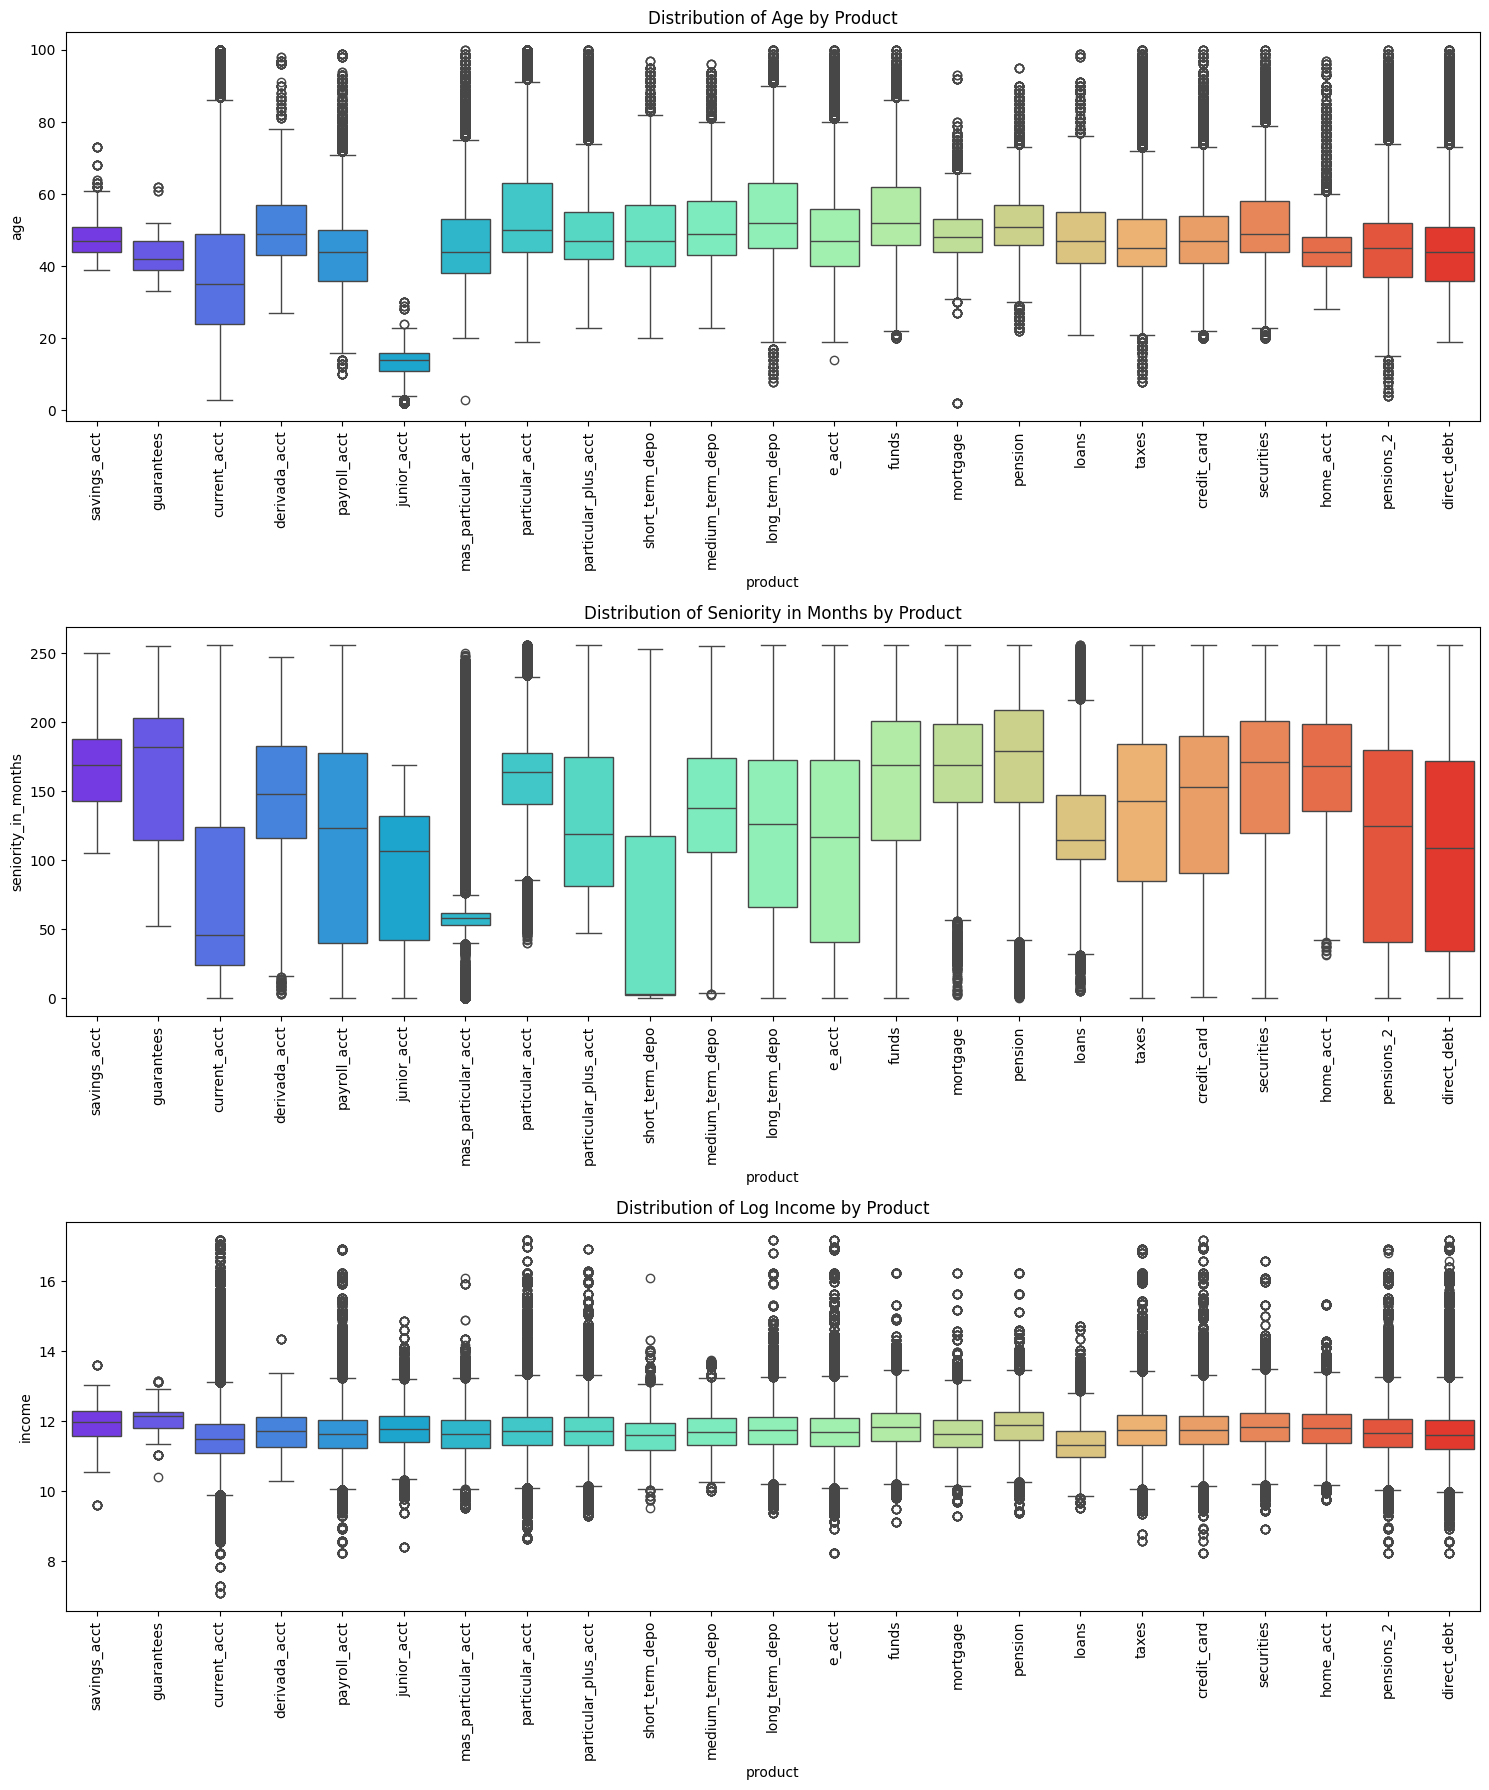

In [32]:
plt.figure(figsize=(15, 18))

# Plot for Age
plt.subplot(3, 1, 1)
sns.boxplot(data=dummy, x='product', y='age', palette='rainbow')
plt.title('Distribution of Age by Product')
plt.xticks(rotation=90)

# Plot for Seniority in Months
plt.subplot(3, 1, 2)
sns.boxplot(data=dummy, x='product', y='seniority_in_months', palette='rainbow')
plt.title('Distribution of Seniority in Months by Product')
plt.xticks(rotation=90)

# Plot for Income
plt.subplot(3, 1, 3)
sns.boxplot(data=dummy, x='product', y='income', palette='rainbow')
plt.title('Distribution of Log Income by Product')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Income (log) Distribution')

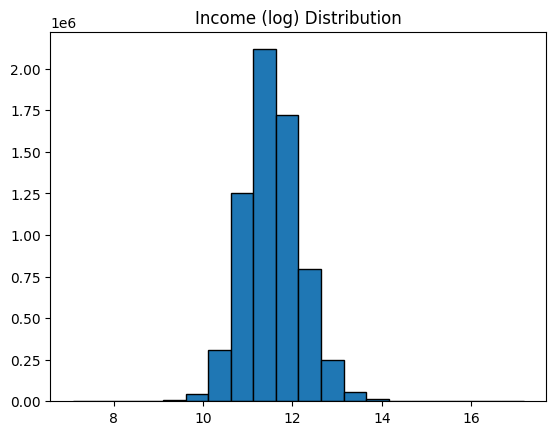

In [33]:
plt.hist(np.log(train['income']), bins=20, edgecolor='black')
plt.title('Income (log) Distribution')

Text(0.5, 1.0, 'Age Distribution')

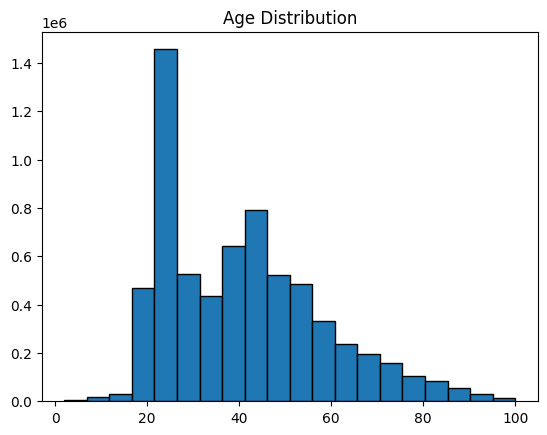

In [34]:
plt.hist(train['age'], bins=20, edgecolor='black')
plt.title('Age Distribution')

Transform categorical variables with label encoder to plot correlation. This will not be a final transformation, it is just to detect correlation

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

correlation = train.copy()

columns_to_encode = ['employee_index', 'country', 'cust_type', 'cust_relationship', 
                     'join_channel', 'province_name', 'segment']

for col in columns_to_encode:
    correlation[col] = le.fit_transform(correlation[col])

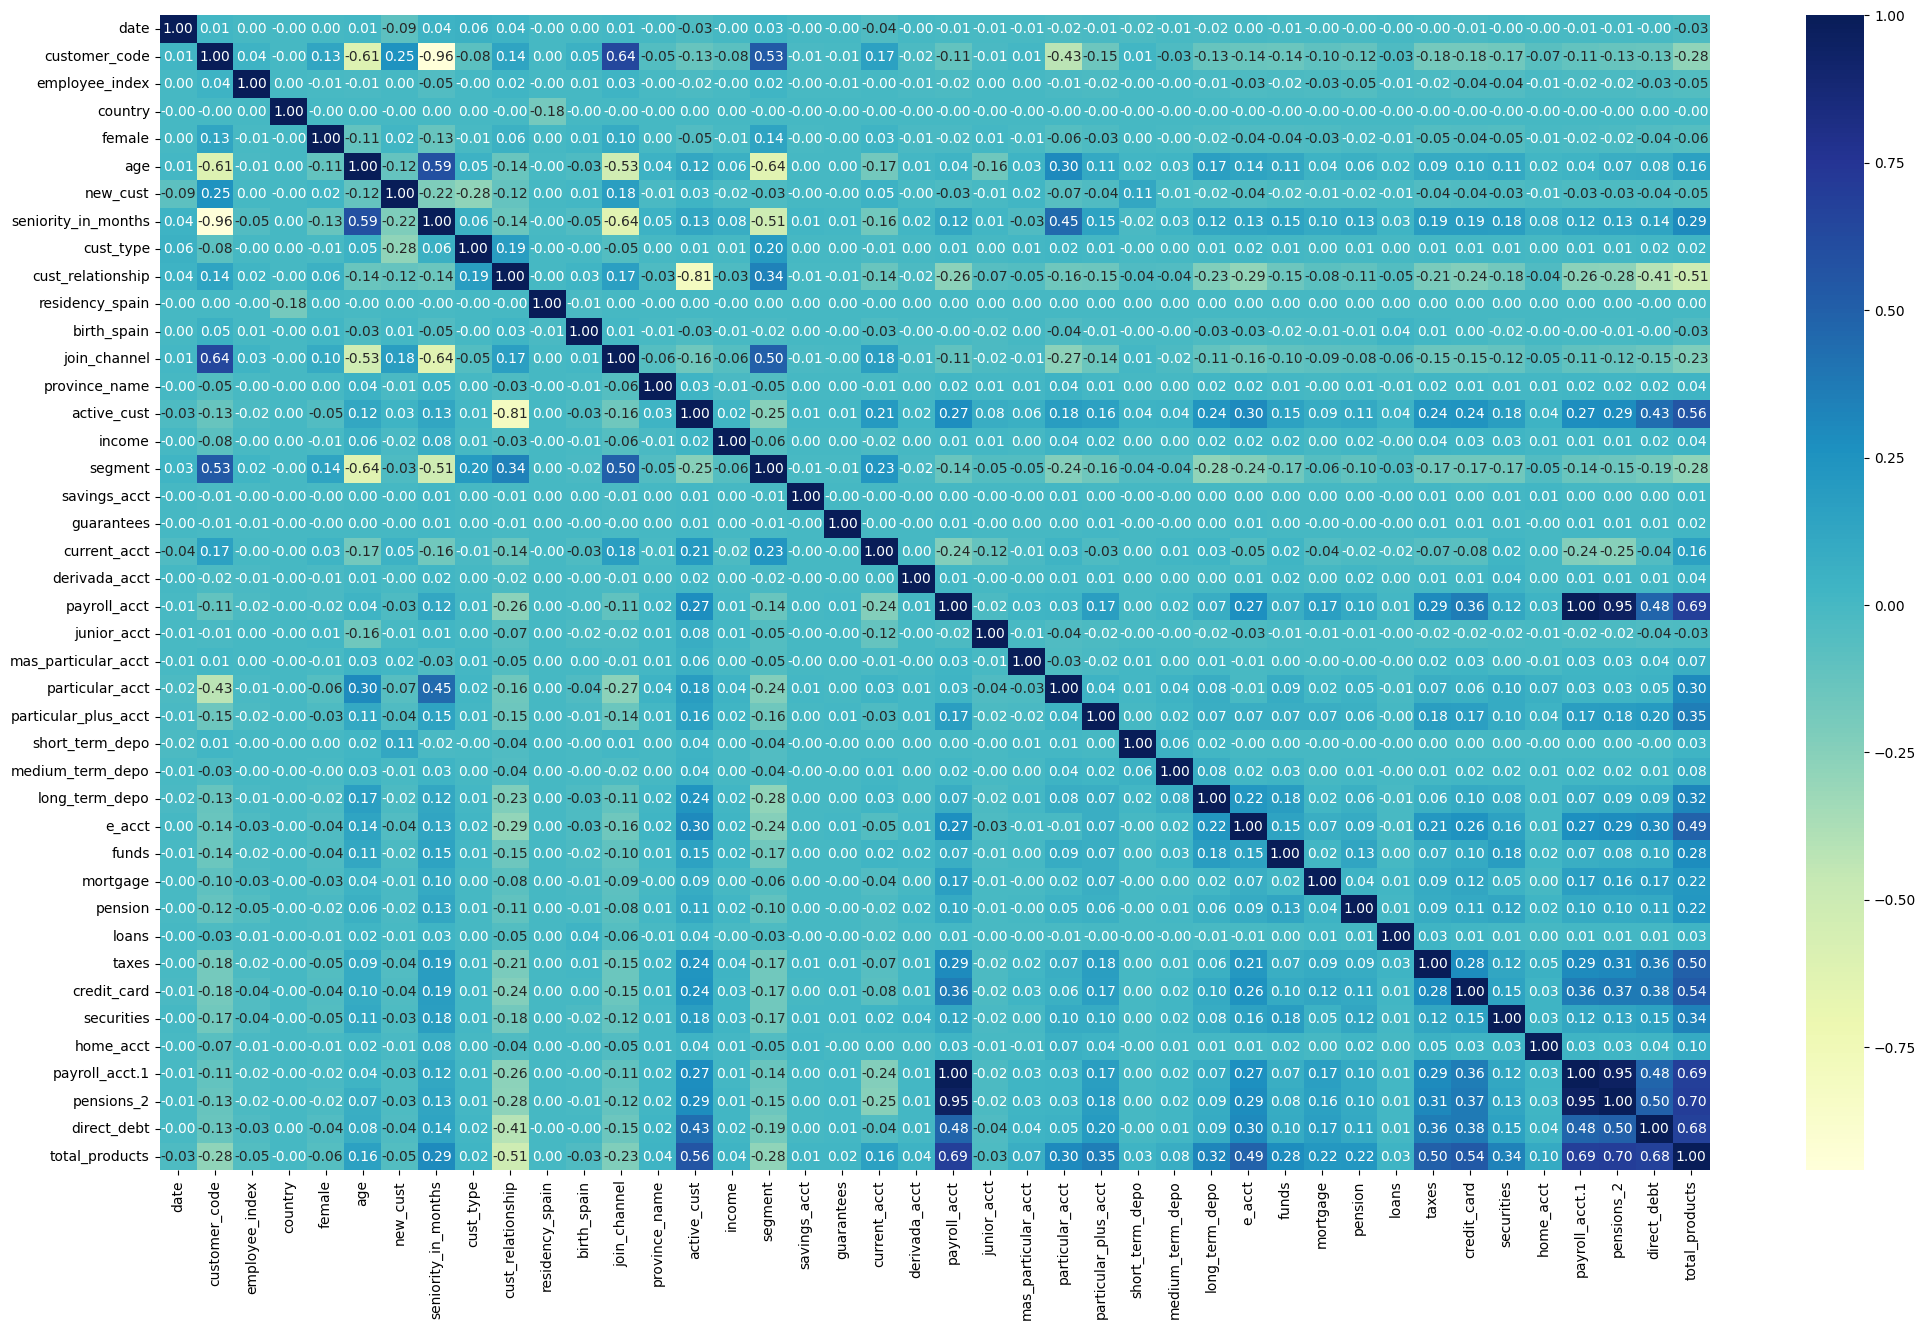

In [36]:
plt.figure(figsize=(25,15))
sns.heatmap(correlation.corr(),annot=True, cmap="YlGnBu", fmt= '.2f')
plt.show()

There are two correlations that draw attention to us. The first one is active_cust and cust_relationship, which is 0.81. The second one is payroll_acct and payroll_acct.1 which is 1. They will both be dropped, the payroll_acct.1 gives us the same information as the payroll_acct and we believe that having such a high correlation between active_cust and cust_relationship would hinder our model

In [37]:
train = train.drop(columns=['payroll_acct.1', 'cust_relationship'])

## Dealing with the categorical values  
Since most of the data is from clients that comes from Spain, we will combine non-spanish clients into an "others" group so we will have only two variables: ES and others. After that we will transform the column in a dummy variable for Spain.

In [38]:
train['country'] = np.where(train['country'] == 'ES', 1, 0)

We will transform the segment column using get_dummies to create two different binary columns for the variables

In [39]:
segment_dummy = pd.get_dummies(train['segment'],drop_first=True)
train = pd.concat([train, segment_dummy], axis=1)

Since total_products is a continuous variable representing how many products each customer has purchased, we will use it as a target for encoding the categorical variables join_channel and province_name, since those have many different variables. We chose target encoding because we would have a dimensionality problem if we chose to transform each variable in a dummy column, and we did not want to use label encoder since it is not an ordinal variable

In [40]:
# pip install category_encoders

In [50]:
import category_encoders as ce

target_encoder = ce.TargetEncoder(cols=['join_channel', 'province_name', 'employee_index'])

train[['join_channel_encoded', 'province_name_encoded', 'employee_index_encoded']] = target_encoder.fit_transform(
    train[['join_channel', 'province_name', 'employee_index']], train['total_products'])

train[['join_channel', 'province_name', 'join_channel_encoded', 'province_name_encoded', 'employee_index_encoded']].head()

,join_channel,province_name,join_channel_encoded,province_name_encoded,employee_index_encoded
0,KAR,MADRID,1.424185,1.749698,1.407278
1,KHE,LERIDA,0.886876,1.006139,1.407278
2,KFC,SEVILLA,1.559984,1.382030,1.407278
3,KFA,MURCIA,1.850124,1.075147,1.407278
5,KAT,MADRID,1.942077,1.749698,1.407278


In [47]:
train['cust_type'] = train['cust_type'].replace({"P": 5})
train['cust_type'] = train['cust_type'].astype(int)

In [51]:
train.columns

Index(['date', 'customer_code', 'employee_index', 'country', 'female', 'age',
       'new_cust', 'seniority_in_months', 'cust_type', 'residency_spain',
       'birth_spain', 'join_channel', 'province_name', 'active_cust', 'income',
       'segment', 'savings_acct', 'guarantees', 'current_acct',
       'derivada_acct', 'payroll_acct', 'junior_acct', 'mas_particular_acct',
       'particular_acct', 'particular_plus_acct', 'short_term_depo',
       'medium_term_depo', 'long_term_depo', 'e_acct', 'funds', 'mortgage',
       'pension', 'loans', 'taxes', 'credit_card', 'securities', 'home_acct',
       'pensions_2', 'direct_debt', 'total_products', '01 - TOP',
       '02 - PARTICULARES', '03 - UNIVERSITARIO', 'join_channel_encoded',
       'province_name_encoded', 'employee_index_encoded'],
      dtype='object')

Normalization/Standartization of data  
We will normalize data for age and seniority in months since it is not normally distributed  
We will standardize income since its log is normally distributed 

In [52]:
# #Decide whether to do normalization or standartization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize using MinMaxScaler
cols_to_normalize = ['age', 'seniority_in_months']
scaler = MinMaxScaler(feature_range=(0, 1))
train[cols_to_normalize] = scaler.fit_transform(train[cols_to_normalize])

# Standardize using StandardScaler
cols_to_standardize = ['income']
scaler = StandardScaler()
train[cols_to_standardize] = scaler.fit_transform(train[cols_to_standardize])

print(train[cols_to_normalize].head())
print(train[cols_to_standardize].head())

        age  seniority_in_months
0  0.632653             0.402344
1  0.214286             0.152344
2  0.387755             0.417969
3  0.397959             0.343750
5  0.459184             0.496094
     income
0  1.989686
1 -0.306603
2 -0.148205
3 -0.228531
5  0.588748


In [44]:
train.to_csv('train_data.csv', index=False)